<a href="https://colab.research.google.com/github/AbdulBaseerMohammedKhan/California-House-Pricing/blob/master/California_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting house prices from the california_housing_train.csv

In [39]:
!git clone https://github.com/AbdulBaseerMohammedKhan/California-House-Pricing.git
!cd California-House-Pricing.git
!git add -A
!git commit --message="Add my-file"
!git push

fatal: destination path 'California-House-Pricing' already exists and is not an empty directory.
/bin/bash: line 0: cd: California-House-Pricing.git: No such file or directory

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@dd7dde2528ef.(none)')
fatal: No configured push destination.
Either specify the URL from the command-line or configure a remote repository using

    git remote add <name> <url>

and then push using the remote name

    git push <name>



In [0]:
 git config --global user.email "you@example.com"
  git config --global user.name "Your Name"


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/sample_data/california_housing_train.csv")

df=df.drop(columns=['longitude', 'latitude'])
df.describe()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

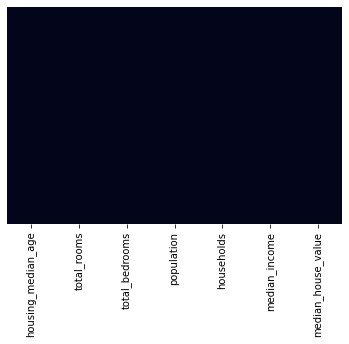

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
df.isnull().sum()


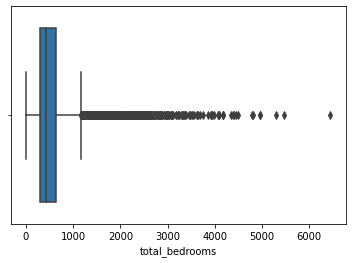

In [27]:
sns.boxplot(x=df['total_bedrooms'])

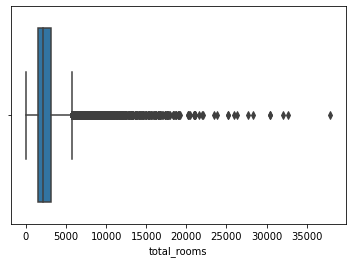

In [28]:
sns.boxplot(x=df['total_rooms'])

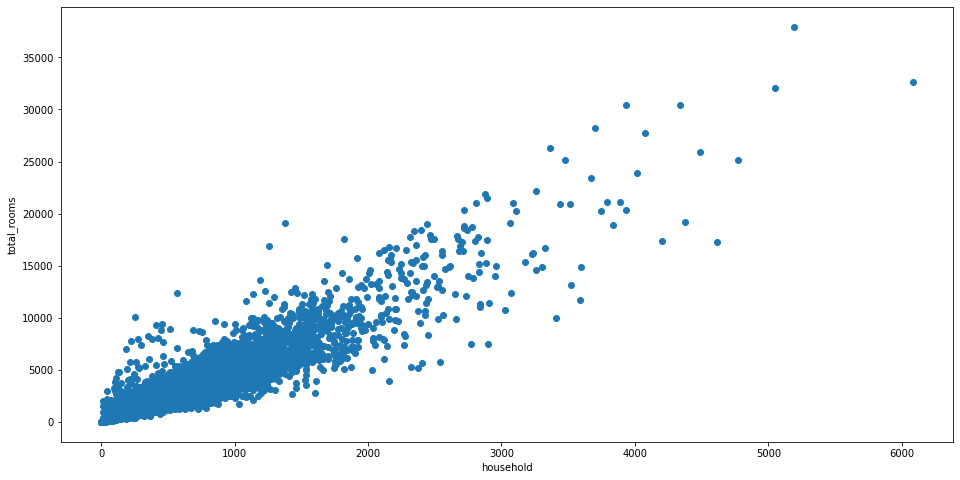

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['households'], df['total_rooms'])
ax.set_xlabel('household')
ax.set_ylabel('total_rooms')
plt.show()

In [0]:
X=df.iloc[:,:-1]
y=df.iloc[:,6]




## Using Multiple Linear Regression

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [16]:
print(score)

print(y_test)

0.5965697318393679
10941    142700.0
5250     500001.0
10292     61800.0
2266     162800.0
6398      90600.0
           ...   
4706     211400.0
8404     500001.0
11114    162500.0
7877     360700.0
6188     137500.0
Name: median_house_value, Length: 3400, dtype: float64


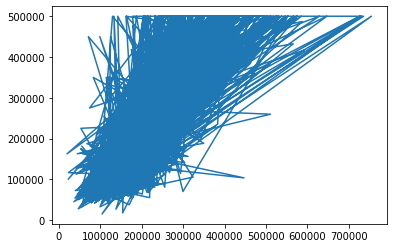

In [17]:
plt.plot(y_pred,y_test)

## Using XGboost

In [18]:
import xgboost
regressor=xgboost.XGBRegressor()
regressor.fit(X_train,y_train)


[13:09:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y_pred=regressor.predict(X_test)

In [0]:
score=r2_score(y_test,y_pred)

In [21]:
print(score)

0.6586422832678624


## Using Artificial Nural Networks

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [23]:
X_train.shape

(13600, 6)

In [24]:
classifier = Sequential()
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 6))
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))
classifier.compile(loss=keras.metrics.mean_squared_error, optimizer='Adamax')
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 200)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=50, kernel_initializer="he_uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit

Train on 10880 samples, validate on 2720 samples
Epoch 1/200
10880/10880 [==============================] - 2s 145us/step - loss: 28978025668.3529 - val_loss: 26648154694.5882
Epoch 2/200
10880/10880 [==============================] - 1s 119us/step - loss: 27380909804.1176 - val_loss: 26332906823.5294
Epoch 3/200
10880/10880 [==============================] - 1s 117us/step - loss: 27026990960.9412 - val_loss: 25930493829.6471
Epoch 4/200
10880/10880 [==============================] - 1s 118us/step - loss: 26665815165.6471 - val_loss: 25536531040.0000
Epoch 5/200
10880/10880 [==============================] - 1s 126us/step - loss: 26241853012.2353 - val_loss: 25079340252.2353
Epoch 6/200
10880/10880 [==============================] - 1s 120us/step - loss: 25757138616.8235 - val_loss: 24581782480.0000
Epoch 7/200
10880/10880 [==============================] - 1s 125us/step - loss: 25250344525.2941 - val_loss: 23924887960.4706
Epoch 8/200
10880/10880 [==============================] - 1s 

In [25]:
y_pred=classifier.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

0.6607727753235055
